In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
data = pd.read_csv("Advertising.csv")
x = data["radio"]
y = data["sales"]
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
def linearEq(x,param):
    return param[0]*x+param[1]

def linearCost(x,y,param):
    yHat = linearEq(x,param)
    n = len(y)
    return (1/n)*sum((y-yHat)**2)

def linearGradient(x,y,param):
    yHat = linearEq(x,param)
    n = len(y)
    return np.array([(-2/n)*np.dot(x,(y-yHat)), (-2/n)*sum(y-yHat)])

In [4]:
def adaGrad(x,y,param, gradFunc, costFunc, learningRate=0.01, iterations=100, precision=0.0001):
    eps = 1e-8
    costValue = []
    sum_sq_grad = [0.0 for i in np.arange(len(param))]
    
    for it in range(iterations):
        costValue.append(costFunc(x,y,param))
        
        gradient = gradFunc(x,y,param)
        sum_sq_grad = sum_sq_grad + (gradient)**2
        
        stepSize = (learningRate * gradient) / np.sqrt(sum_sq_grad+eps)
        
        if(all(np.abs(stepSize) < precision)):
            break
        
        param = param - stepSize

    return param, costValue

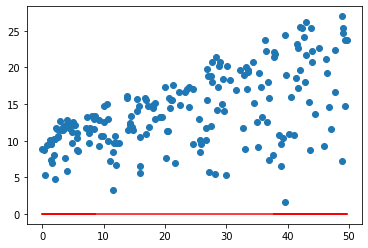

In [31]:
param = np.array([0,0])

plt.scatter(x,y)
plt.plot(x,linearEq(x,param),"red")

In [129]:
param = np.array([0.0,0.0])

param, costValue = adaGrad(x,y,param, linearGradient, linearCost, 0.01, 500, 0.00001)

param

array([0.34122095, 0.36571984])

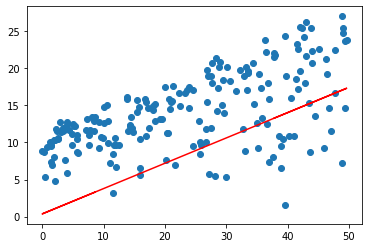

In [130]:
plt.scatter(x,y)
plt.plot(x,linearEq(x,param),"red")

500


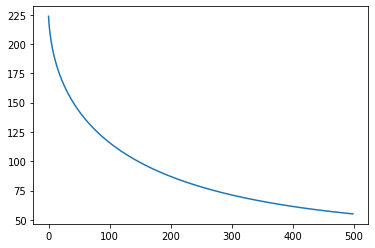

In [131]:
print(len(costValue))
plt.plot(range(len(costValue)),costValue)

In [6]:
data = pd.read_csv("dataset1.csv")

x = data["Time"]
y = data["CDF"]

data.head()

,Time,Faults,CDF
0,1,1,1
1,2,6,7
2,3,0,7
3,4,2,9
4,5,0,9


array([0.83140972, 0.83053259])

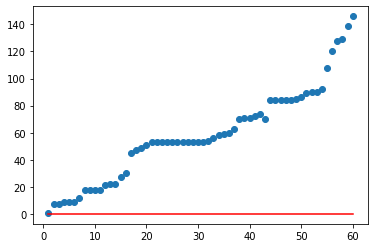

In [17]:
param = np.array([0.0,0.0])

plt.scatter(x,y)
plt.plot(x,linearEq(x,param),"red")


param, costValue = adaGrad(x,y,param, linearGradient, linearCost, 0.05, 100, 0.0001)

param

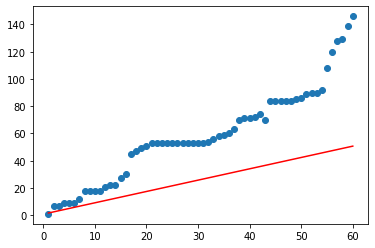

In [18]:
plt.scatter(x,y)
plt.plot(x,linearEq(x,param),"red")

100


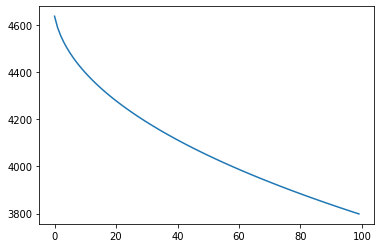

In [171]:
print(len(costValue))
plt.plot(range(len(costValue)),costValue)